In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('CarPrice_Assignment.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
dataset.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
dataset.duplicated().sum()

0

In [8]:
dataset['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
dataset['CarName']=dataset['CarName'].apply(lambda x:x.split(' ')[0])
dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
dataset['CarName']=dataset['CarName'].str.replace('porcshce','porsche')
dataset['CarName']=dataset['CarName'].str.replace('maxda','mazda')
dataset['CarName']=dataset['CarName'].str.replace('vokswagen','volkswagen')
dataset['CarName']=dataset['CarName'].str.replace('vw','volkswagen')
dataset['CarName']=dataset['CarName'].str.replace('toyouta','toyota')

In [11]:
dataset['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
percent1=dataset['wheelbase'].quantile(0.25)
percent3=dataset['wheelbase'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [13]:
dataset['wheelbase']=np.where(dataset['wheelbase']<lower_limit,lower_limit,(np.where(dataset['wheelbase']>upper_limit,upper_limit,dataset['wheelbase'])))

In [14]:
percent1=dataset['carlength'].quantile(0.25)
percent3=dataset['carlength'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [16]:
dataset['carlength']=np.where(dataset['carlength']<lower_limit,lower_limit,(np.where(dataset['carlength']>upper_limit,upper_limit,dataset['carlength'])))

In [17]:
percent1=dataset['carwidth'].quantile(0.25)
percent3=dataset['carwidth'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [18]:
dataset['carwidth']=np.where(dataset['carwidth']<lower_limit,lower_limit,(np.where(dataset['carwidth']>upper_limit,upper_limit,dataset['carwidth'])))

In [19]:
percent1=dataset['enginesize'].quantile(0.25)
percent3=dataset['enginesize'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [20]:
dataset['enginesize']=np.where(dataset['enginesize']<lower_limit,lower_limit,(np.where(dataset['enginesize']>upper_limit,upper_limit,dataset['enginesize'])))

In [21]:
percent1=dataset['stroke'].quantile(0.25)
percent3=dataset['stroke'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [22]:
dataset['stroke']=np.where(dataset['stroke']<lower_limit,lower_limit,(np.where(dataset['stroke']>upper_limit,upper_limit,dataset['stroke'])))

In [23]:
percent1=dataset['compressionratio'].quantile(0.25)
percent3=dataset['compressionratio'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [24]:
dataset['compressionratio']=np.where(dataset['compressionratio']<lower_limit,lower_limit,(np.where(dataset['compressionratio']>upper_limit,upper_limit,dataset['compressionratio'])))

In [25]:
percent1=dataset['horsepower'].quantile(0.25)
percent3=dataset['horsepower'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [26]:
dataset['horsepower']=np.where(dataset['horsepower']<lower_limit,lower_limit,(np.where(dataset['horsepower']>upper_limit,upper_limit,dataset['horsepower'])))

In [27]:
percent1=dataset['peakrpm'].quantile(0.25)
percent3=dataset['peakrpm'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [28]:
dataset['peakrpm']=np.where(dataset['peakrpm']<lower_limit,lower_limit,(np.where(dataset['peakrpm']>upper_limit,upper_limit,dataset['peakrpm'])))

In [29]:
percent1=dataset['citympg'].quantile(0.25)
percent3=dataset['citympg'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [30]:
dataset['citympg']=np.where(dataset['citympg']<lower_limit,lower_limit,(np.where(dataset['citympg']>upper_limit,upper_limit,dataset['citympg'])))

In [31]:
percent1=dataset['highwaympg'].quantile(0.25)
percent3=dataset['highwaympg'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [32]:
dataset['highwaympg']=np.where(dataset['highwaympg']<lower_limit,lower_limit,(np.where(dataset['highwaympg']>upper_limit,upper_limit,dataset['highwaympg'])))

In [33]:
percent1=dataset['car_ID'].quantile(0.25)
percent3=dataset['car_ID'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [34]:
dataset['car_ID']=np.where(dataset['car_ID']<lower_limit,lower_limit,(np.where(dataset['car_ID']>upper_limit,upper_limit,dataset['car_ID'])))

In [35]:
percent1=dataset['symboling'].quantile(0.25)
percent3=dataset['symboling'].quantile(0.75)
IQR=percent3-percent1
lower_limit=percent1-1.5*IQR
upper_limit=percent3+1.5*IQR

In [36]:
dataset['symboling']=np.where(dataset['symboling']<lower_limit,lower_limit,(np.where(dataset['symboling']>upper_limit,upper_limit,dataset['symboling'])))

In [37]:
categorical_columns = ['fueltype', 'doornumber', 'carbody', 'drivewheel',
                        'enginetype', 'cylindernumber', 'fuelsystem','CarName','aspiration','enginelocation']

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    float64
 1   symboling         205 non-null    float64
 2   CarName           205 non-null    int32  
 3   fueltype          205 non-null    int32  
 4   aspiration        205 non-null    int32  
 5   doornumber        205 non-null    int32  
 6   carbody           205 non-null    int32  
 7   drivewheel        205 non-null    int32  
 8   enginelocation    205 non-null    int32  
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int32  
 15  cylindernumber    205 non-null    int32  
 16  enginesize        205 non-null    float64
 1

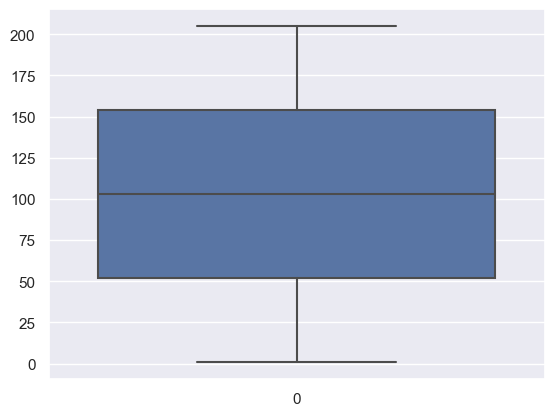

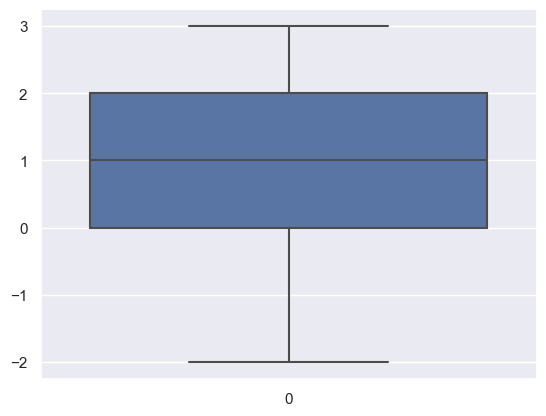

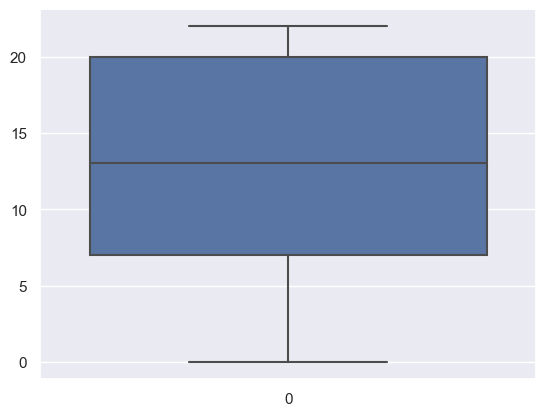

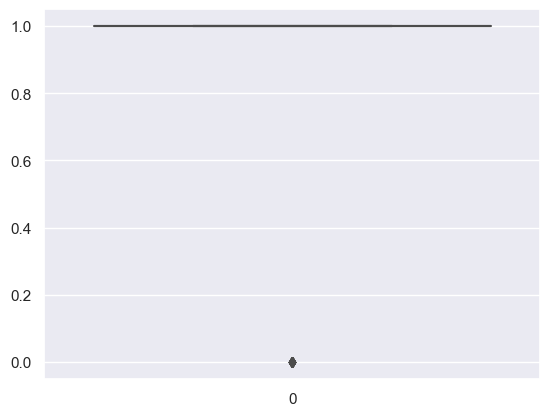

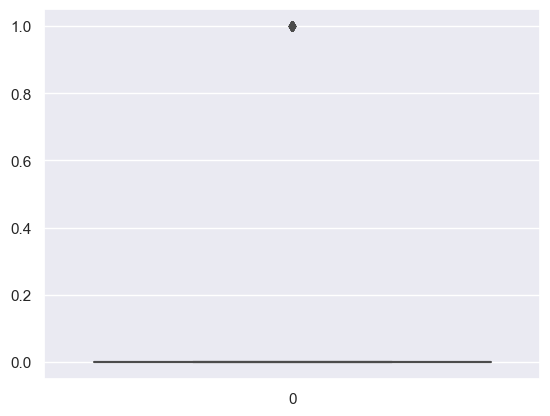

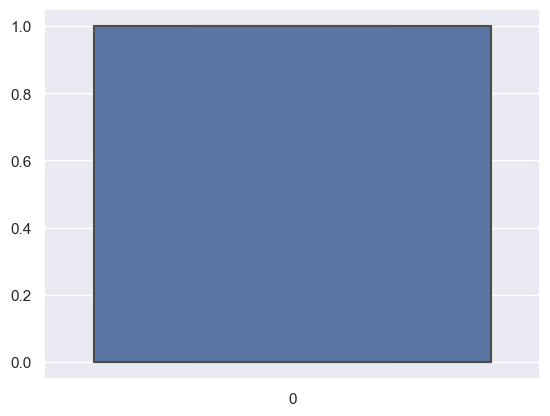

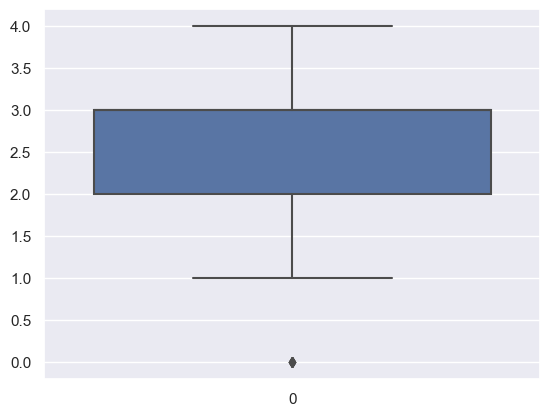

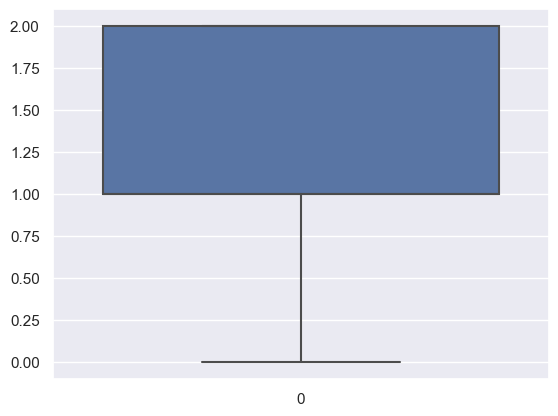

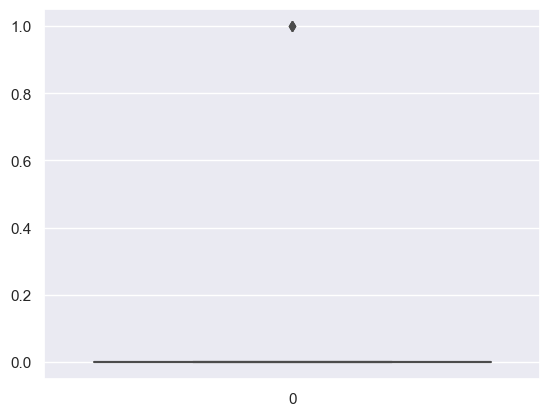

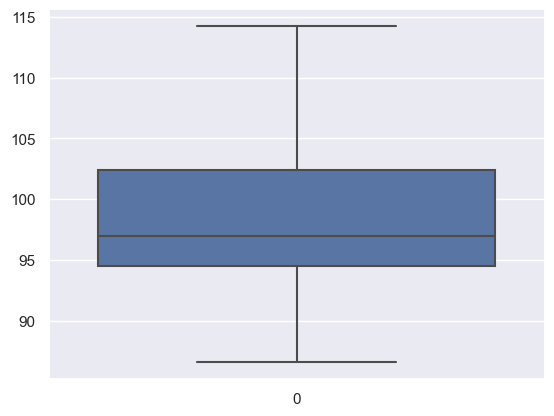

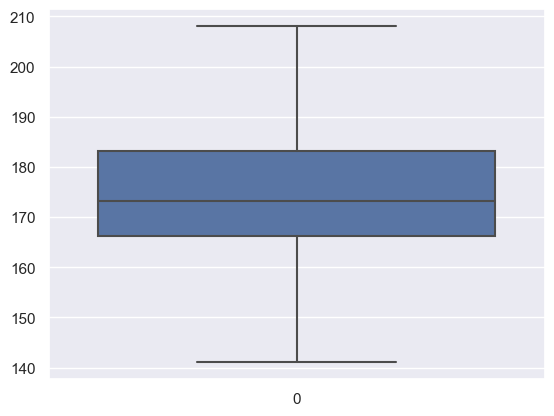

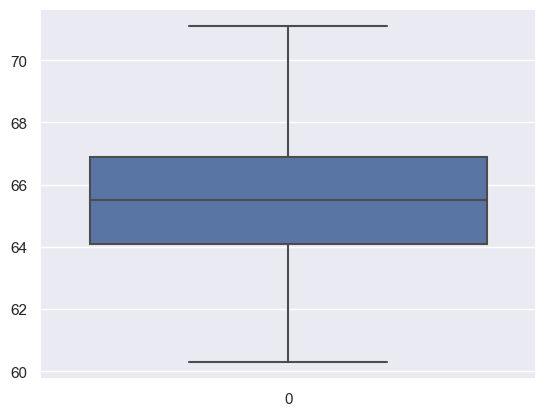

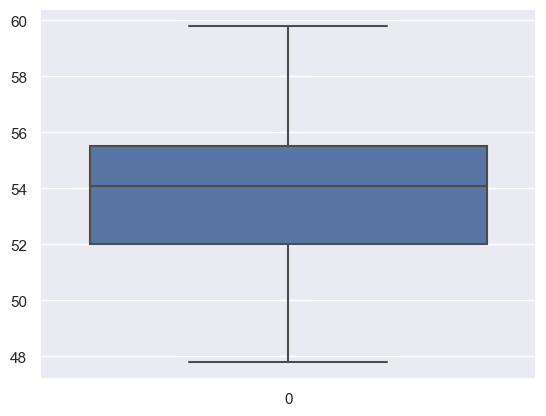

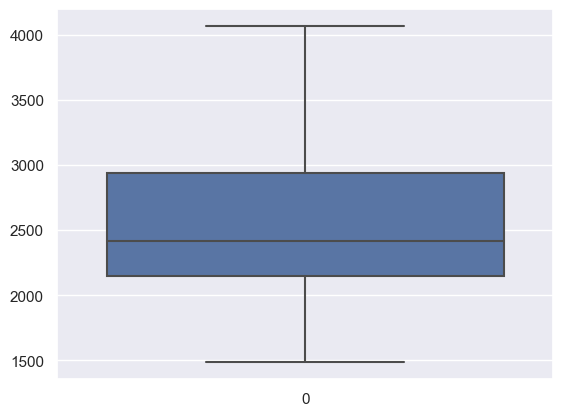

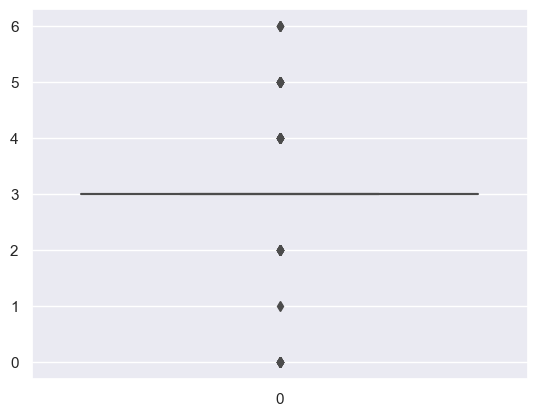

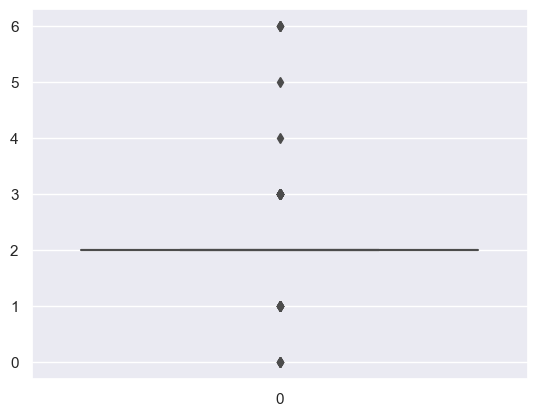

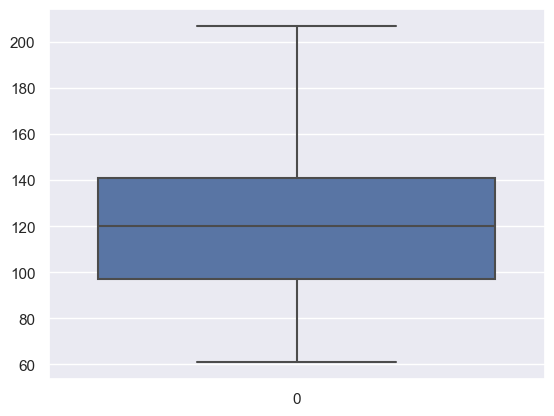

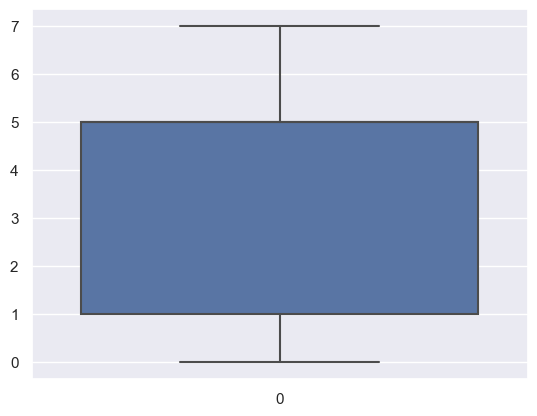

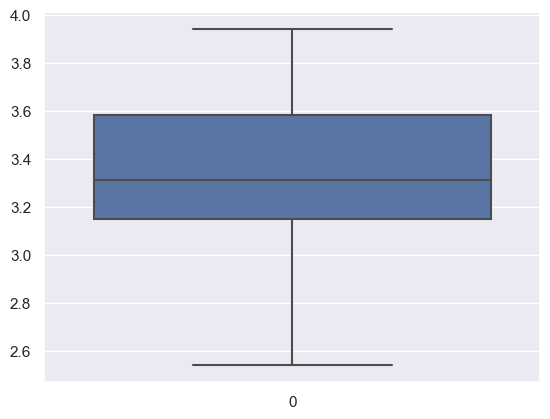

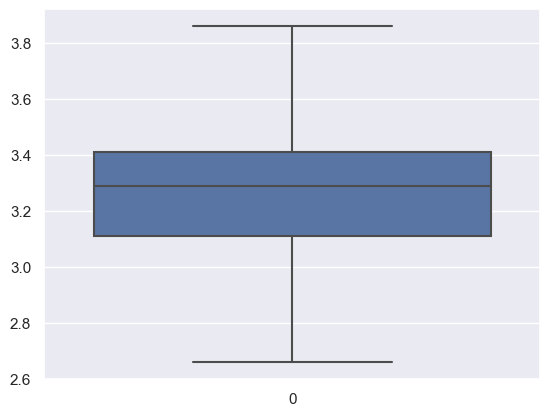

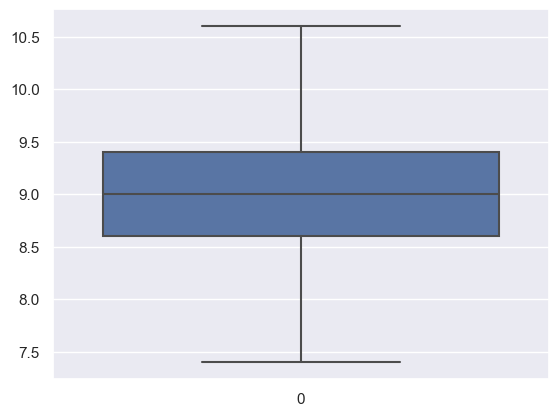

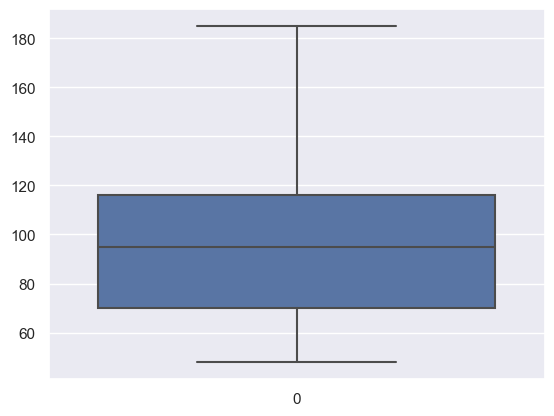

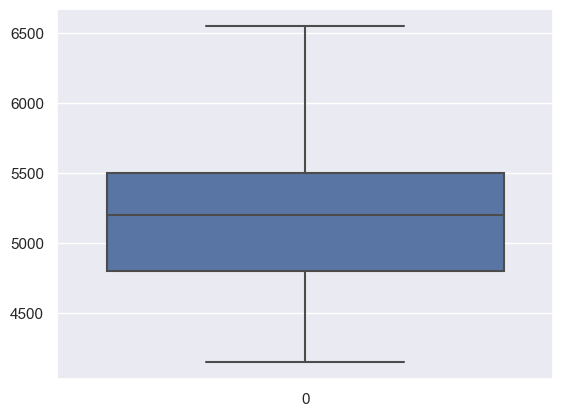

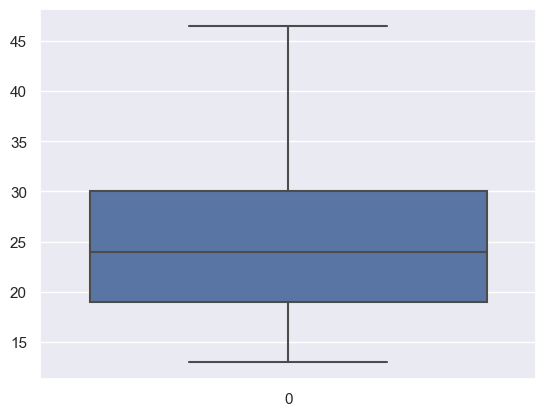

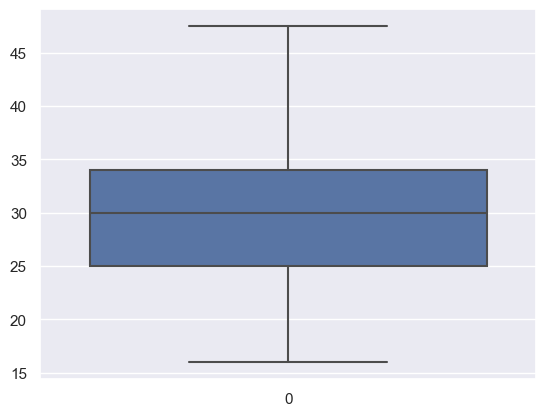

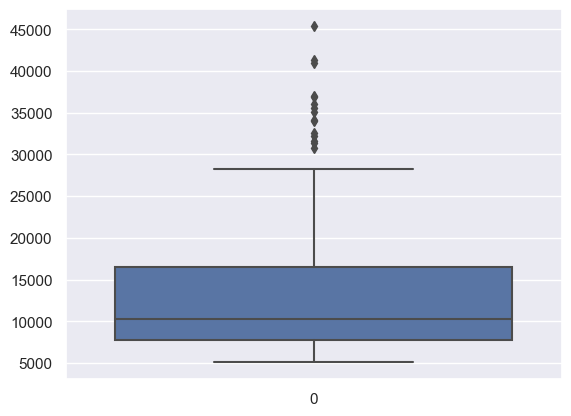

In [42]:
def boxplots(col):
    sns.boxplot(dataset[col])
    plt.show()
for i in list(dataset.select_dtypes(exclude='object').columns)[0:]:
    boxplots(i)

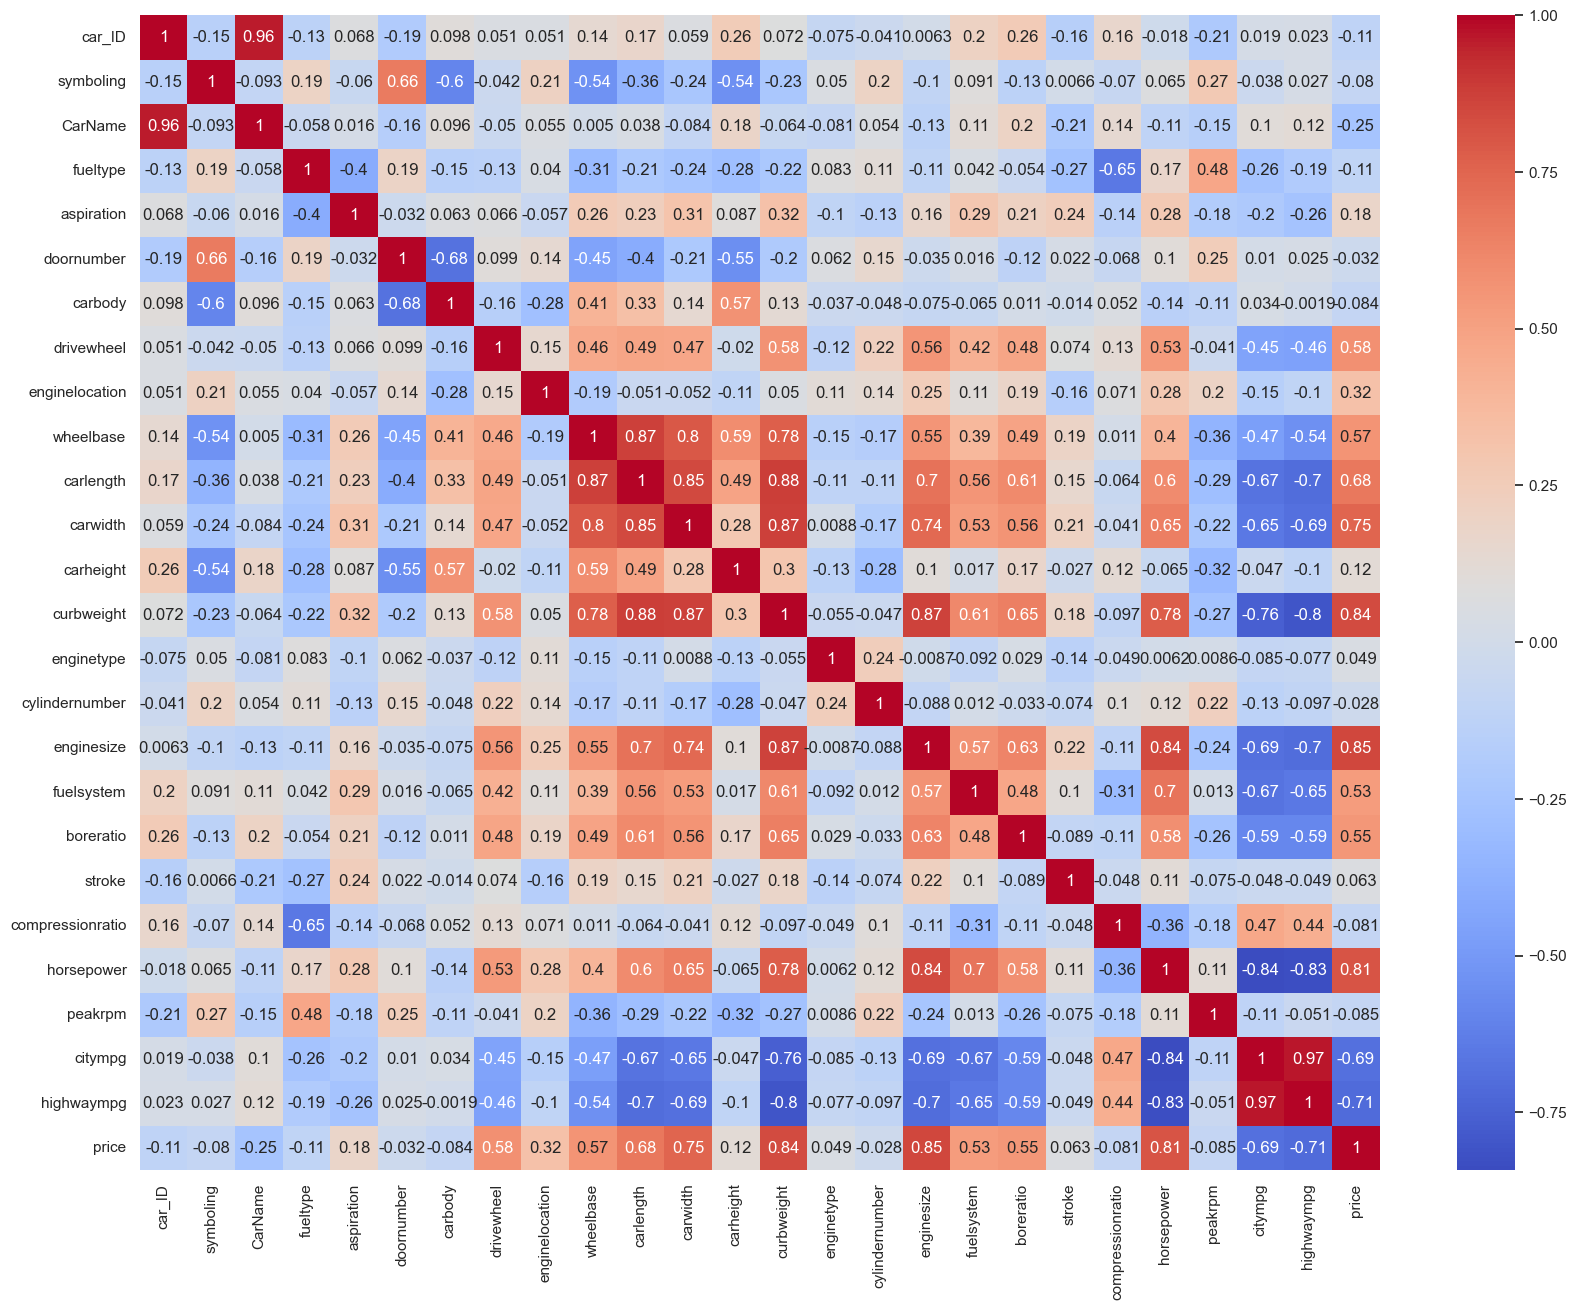

In [43]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm')
plt.show()

In [44]:
dataset=dataset.drop(columns=['curbweight','enginesize','horsepower'],axis=1)
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price
0,1.0,3.0,1,1,0,1,0,2,0,88.6,...,0,2,5,3.47,2.68,9.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,1,1,0,1,0,2,0,88.6,...,0,2,5,3.47,2.68,9.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,1,1,0,1,2,2,0,94.5,...,5,3,5,2.68,3.47,9.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,2,1,0,0,3,1,0,99.8,...,3,2,5,3.19,3.40,10.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,2,1,0,0,3,0,0,99.4,...,3,1,5,3.19,3.40,8.0,5500.0,18.0,22.0,17450.0


In [45]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.723622,1.743470,-1.914744,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,...,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,-0.552143
1,-1.706724,1.743470,-1.914744,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,...,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,-0.552143
2,-1.689826,0.133509,-1.914744,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.717590,...,-0.543527,1.886890,1.112210,0.869568,-2.404880,0.753841,-0.049433,-0.262757,-0.958163,-0.702161
3,-1.672928,0.938490,-1.756977,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.185580,...,0.235942,-0.013908,-0.147475,0.869568,-0.517266,0.500383,1.214121,0.791357,-0.186058,-0.102086
4,-1.656029,0.938490,-1.756977,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.117416,...,0.235942,-0.013908,-1.407161,0.869568,-0.517266,0.500383,-1.312986,0.791357,-1.112584,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,1.398348,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,...,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,0.582344,0.580534,-0.340479,-0.402124
201,1.672928,-1.476452,1.398348,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,...,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,-0.428499,0.369711,-0.958163,-0.852180
202,1.689826,-1.476452,1.398348,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,...,0.728239,1.886890,1.112210,0.869568,0.926204,-1.418663,-0.302143,0.791357,-1.112584,-1.152218
203,1.706724,-1.476452,1.398348,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,...,0.728239,-0.013908,1.112210,-0.126306,-1.183483,0.500383,1.972253,-0.684403,0.122783,-0.552143


In [47]:
variable=sc_x
variable.shape

(205, 22)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [49]:
vif

,variance_inflation_factor,features
0,25.730193,car_ID
1,2.705023,symboling
2,26.104520,CarName
3,4.932668,fueltype
4,2.141491,aspiration
5,2.719085,doornumber
6,2.809687,carbody
7,2.722474,drivewheel
8,1.441431,enginelocation
9,9.777770,wheelbase


In [50]:
dataset=dataset.drop(columns=['CarName'],axis=1)
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg,price
0,1.0,3.0,1,0,1,0,2,0,88.6,168.8,...,0,2,5,3.47,2.68,9.0,5000.0,21.0,27.0,13495.0
1,2.0,3.0,1,0,1,0,2,0,88.6,168.8,...,0,2,5,3.47,2.68,9.0,5000.0,21.0,27.0,16500.0
2,3.0,1.0,1,0,1,2,2,0,94.5,171.2,...,5,3,5,2.68,3.47,9.0,5000.0,19.0,26.0,16500.0
3,4.0,2.0,1,0,0,3,1,0,99.8,176.6,...,3,2,5,3.19,3.40,10.0,5500.0,24.0,30.0,13950.0
4,5.0,2.0,1,0,0,3,0,0,99.4,176.6,...,3,1,5,3.19,3.40,8.0,5500.0,18.0,22.0,17450.0


In [51]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.723622,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.426521,...,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,-0.552143
1,-1.706724,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.426521,...,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.649321,-0.552143
2,-1.689826,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.717590,-0.231513,...,-0.543527,1.886890,1.112210,0.869568,-2.404880,0.753841,-0.049433,-0.262757,-0.958163,-0.702161
3,-1.672928,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.185580,0.207256,...,0.235942,-0.013908,-0.147475,0.869568,-0.517266,0.500383,1.214121,0.791357,-0.186058,-0.102086
4,-1.656029,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.117416,0.207256,...,0.235942,-0.013908,-1.407161,0.869568,-0.517266,0.500383,-1.312986,0.791357,-1.112584,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,0.582344,0.580534,-0.340479,-0.402124
201,1.672928,-1.476452,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,-0.428499,0.369711,-0.958163,-0.852180
202,1.689826,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,0.728239,1.886890,1.112210,0.869568,0.926204,-1.418663,-0.302143,0.791357,-1.112584,-1.152218
203,1.706724,-1.476452,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,...,0.728239,-0.013908,1.112210,-0.126306,-1.183483,0.500383,1.972253,-0.684403,0.122783,-0.552143


In [53]:
variable=sc_x
variable.shape

(205, 21)

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [55]:
vif

,variance_inflation_factor,features
0,1.435869,car_ID
1,2.684909,symboling
2,4.932538,fueltype
3,2.140263,aspiration
4,2.719080,doornumber
5,2.785376,carbody
6,2.517530,drivewheel
7,1.441431,enginelocation
8,9.773252,wheelbase
9,10.907334,carlength


In [56]:
dataset=dataset.drop('citympg',axis=1)
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1.0,3.0,1,0,1,0,2,0,88.6,168.8,...,48.8,0,2,5,3.47,2.68,9.0,5000.0,27.0,13495.0
1,2.0,3.0,1,0,1,0,2,0,88.6,168.8,...,48.8,0,2,5,3.47,2.68,9.0,5000.0,27.0,16500.0
2,3.0,1.0,1,0,1,2,2,0,94.5,171.2,...,52.4,5,3,5,2.68,3.47,9.0,5000.0,26.0,16500.0
3,4.0,2.0,1,0,0,3,1,0,99.8,176.6,...,54.3,3,2,5,3.19,3.40,10.0,5500.0,30.0,13950.0
4,5.0,2.0,1,0,0,3,0,0,99.4,176.6,...,54.3,3,1,5,3.19,3.40,8.0,5500.0,22.0,17450.0


In [57]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.723622,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.426521,-0.858695,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.552143
1,-1.706724,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.426521,-0.858695,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.552143
2,-1.689826,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.717590,-0.231513,-0.184978,-0.543527,1.886890,1.112210,0.869568,-2.404880,0.753841,-0.049433,-0.262757,-0.702161
3,-1.672928,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.185580,0.207256,0.151880,0.235942,-0.013908,-0.147475,0.869568,-0.517266,0.500383,1.214121,0.791357,-0.102086
4,-1.656029,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.117416,0.207256,0.248125,0.235942,-0.013908,-1.407161,0.869568,-0.517266,0.500383,-1.312986,0.791357,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,1.451189,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,0.582344,0.580534,-0.402124
201,1.672928,-1.476452,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,1.403066,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,-0.428499,0.369711,-0.852180
202,1.689826,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,1.451189,0.728239,1.886890,1.112210,0.869568,0.926204,-1.418663,-0.302143,0.791357,-1.152218
203,1.706724,-1.476452,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.198549,1.451189,0.728239,-0.013908,1.112210,-0.126306,-1.183483,0.500383,1.972253,-0.684403,-0.552143


In [59]:
variable=sc_x
variable.shape

(205, 20)

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [61]:
vif

,variance_inflation_factor,features
0,1.435860,car_ID
1,2.642020,symboling
2,4.916654,fueltype
3,2.122249,aspiration
4,2.667304,doornumber
5,2.778606,carbody
6,2.509072,drivewheel
7,1.423600,enginelocation
8,9.416495,wheelbase
9,10.439103,carlength


In [62]:
dataset=dataset.drop('carlength',axis=1)
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1.0,3.0,1,0,1,0,2,0,88.6,64.1,48.8,0,2,5,3.47,2.68,9.0,5000.0,27.0,13495.0
1,2.0,3.0,1,0,1,0,2,0,88.6,64.1,48.8,0,2,5,3.47,2.68,9.0,5000.0,27.0,16500.0
2,3.0,1.0,1,0,1,2,2,0,94.5,65.5,52.4,5,3,5,2.68,3.47,9.0,5000.0,26.0,16500.0
3,4.0,2.0,1,0,0,3,1,0,99.8,66.2,54.3,3,2,5,3.19,3.40,10.0,5500.0,30.0,13950.0
4,5.0,2.0,1,0,0,3,0,0,99.4,66.4,54.3,3,1,5,3.19,3.40,8.0,5500.0,22.0,17450.0


In [63]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-1.723622,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.858695,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.552143
1,-1.706724,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.723005,-0.858695,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.552143
2,-1.689826,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.717590,-0.184978,-0.543527,1.886890,1.112210,0.869568,-2.404880,0.753841,-0.049433,-0.262757,-0.702161
3,-1.672928,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.185580,0.151880,0.235942,-0.013908,-0.147475,0.869568,-0.517266,0.500383,1.214121,0.791357,-0.102086
4,-1.656029,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.117416,0.248125,0.235942,-0.013908,-1.407161,0.869568,-0.517266,0.500383,-1.312986,0.791357,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.451189,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,0.582344,0.580534,-0.402124
201,1.672928,-1.476452,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.403066,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,-0.428499,0.369711,-0.852180
202,1.689826,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.451189,0.728239,1.886890,1.112210,0.869568,0.926204,-1.418663,-0.302143,0.791357,-1.152218
203,1.706724,-1.476452,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.770387,1.451189,0.728239,-0.013908,1.112210,-0.126306,-1.183483,0.500383,1.972253,-0.684403,-0.552143


In [65]:
variable=sc_x
variable.shape

(205, 19)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [67]:
vif

,variance_inflation_factor,features
0,1.427787,car_ID
1,2.582843,symboling
2,4.909726,fueltype
3,2.037171,aspiration
4,2.568867,doornumber
5,2.656597,carbody
6,2.500373,drivewheel
7,1.418173,enginelocation
8,8.457590,wheelbase
9,5.756003,carwidth


In [68]:
dataset=dataset.drop('wheelbase',axis=1)
dataset.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,peakrpm,highwaympg,price
0,1.0,3.0,1,0,1,0,2,0,64.1,48.8,0,2,5,3.47,2.68,9.0,5000.0,27.0,13495.0
1,2.0,3.0,1,0,1,0,2,0,64.1,48.8,0,2,5,3.47,2.68,9.0,5000.0,27.0,16500.0
2,3.0,1.0,1,0,1,2,2,0,65.5,52.4,5,3,5,2.68,3.47,9.0,5000.0,26.0,16500.0
3,4.0,2.0,1,0,0,3,1,0,66.2,54.3,3,2,5,3.19,3.40,10.0,5500.0,30.0,13950.0
4,5.0,2.0,1,0,0,3,0,0,66.4,54.3,3,1,5,3.19,3.40,8.0,5500.0,22.0,17450.0


In [69]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.723622,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.858695,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.552143
1,-1.706724,1.743470,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-0.858695,-2.020417,-2.865105,-0.147475,0.869568,0.519071,-2.106623,-0.049433,-0.262757,-0.552143
2,-1.689826,0.133509,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.184978,-0.543527,1.886890,1.112210,0.869568,-2.404880,0.753841,-0.049433,-0.262757,-0.702161
3,-1.672928,0.938490,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.151880,0.235942,-0.013908,-0.147475,0.869568,-0.517266,0.500383,1.214121,0.791357,-0.102086
4,-1.656029,0.938490,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.248125,0.235942,-0.013908,-1.407161,0.869568,-0.517266,0.500383,-1.312986,0.791357,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.451189,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,0.582344,0.580534,-0.402124
201,1.672928,-1.476452,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.403066,0.728239,-0.013908,-0.147475,0.869568,1.666445,-0.404828,-0.428499,0.369711,-0.852180
202,1.689826,-1.476452,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.451189,0.728239,1.886890,1.112210,0.869568,0.926204,-1.418663,-0.302143,0.791357,-1.152218
203,1.706724,-1.476452,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.451189,0.728239,-0.013908,1.112210,-0.126306,-1.183483,0.500383,1.972253,-0.684403,-0.552143


In [71]:
variable=sc_x
variable.shape

(205, 18)

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable=sc_x
vif=pd.DataFrame()
vif['variance_inflation_factor']=[variance_inflation_factor(variable,i) for i in range(variable.shape[1])]
vif['features']=x.columns

In [73]:
vif

,variance_inflation_factor,features
0,1.426432,car_ID
1,2.321026,symboling
2,4.862184,fueltype
3,2.030164,aspiration
4,2.564139,doornumber
5,2.630714,carbody
6,2.213473,drivewheel
7,1.353056,enginelocation
8,3.786638,carwidth
9,2.195830,carheight


In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(164, 18) (41, 18) (164,) (41,)


In [75]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.938
Method:                 Least Squares   F-statistic:                              140.0
Date:                Sat, 13 Jan 2024   Prob (F-statistic):                    1.69e-82
Time:                        10:19:47   Log-Likelihood:                         -1584.1
No. Observations:                 164   AIC:                                      3204.
Df Residuals:                     146   BIC:                                      3260.
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
car_ID             -24.0427      6.080     -3.954      0.000     -36.060     -12.026
symboling         -646.5968    388.367     -1.665      0.098   -1414.145     120.951
fueltype         -4779.1839   2207.798     -2.165      0.032   -9142.555    -415.813
aspiration       -2277.3518   1147.099     -1.985      0.049   -4544.417     -10.287
doornumber         410.4434   1041.050      0.394      0.694   -1647.032    2467.918
carbody           -438.7861    562.820     -0.780      0.437   -1551.112     673.540
drivewheel        2637.2091    859.231      3.069      0.003     939.072    4335.347
enginelocation    1.906e+04   2793.409      6.823      0.000    1.35e+04    2.46e+04
carwidth          1111.7225    198.748      5.594      0.000     718.929    1504.516
carheight         -260.9846    162.299     -1.608      0.110    -581.744      59.775
enginetype         203.2330    335.660      0.605      0.546    -460.147     866.613
cylindernumber   -1111.8298    463.223     -2.400      0.018   -2027.319    -196.340
fuelsystem         231.6610    249.504      0.928      0.355    -261.446     724.768
boreratio        -2246.3000   1732.002     -1.297      0.197   -5669.334    1176.734
stroke           -2410.5256   1296.486     -1.859      0.065   -4972.830     151.779
compressionratio    19.3306    775.703      0.025      0.980   -1513.726    1552.388
peakrpm             -1.2818      0.889     -1.442      0.151      -3.038       0.475
highwaympg        -591.4592     77.260     -7.655      0.000    -744.151    -438.767
==============================================================================
Omnibus:                       47.719   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.296
Skew:                           1.208   Prob(JB):                     4.58e-27
Kurtosis:                       6.451   Cond. No.                     4.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
dataset=dataset.drop('enginetype',axis=1)
dataset.head()

,car_ID,symboling,fueltype,aspiration,carbody,drivewheel,enginelocation,carwidth,carheight,cylindernumber,fuelsystem,boreratio,stroke,peakrpm,highwaympg,price
0,1.0,3.0,1,0,0,2,0,64.1,48.8,2,5,3.47,2.68,5000.0,27.0,13495.0
1,2.0,3.0,1,0,0,2,0,64.1,48.8,2,5,3.47,2.68,5000.0,27.0,16500.0
2,3.0,1.0,1,0,2,2,0,65.5,52.4,3,5,2.68,3.47,5000.0,26.0,16500.0
3,4.0,2.0,1,0,3,1,0,66.2,54.3,2,5,3.19,3.40,5500.0,30.0,13950.0
4,5.0,2.0,1,0,3,0,0,66.4,54.3,1,5,3.19,3.40,5500.0,22.0,17450.0


In [91]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [92]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20,random_state=101)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(164, 15) (41, 15) (164,) (41,)


In [93]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as smf
reg_model=smf.OLS(endog=y_train,exog=x_train).fit()
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.945
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              170.7
Date:                Sat, 13 Jan 2024   Prob (F-statistic):                    1.05e-85
Time:                        10:26:04   Log-Likelihood:                         -1584.4
No. Observations:                 164   AIC:                                      3199.
Df Residuals:                     149   BIC:                                      3245.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
car_ID           -24.0804      5.902     -4.080      0.000     -35.743     -12.418
symboling       -596.6699    336.918     -1.771      0.079   -1262.425      69.085
fueltype       -4806.1247   1518.983     -3.164      0.002   -7807.654   -1804.595
aspiration     -2335.7430   1007.842     -2.318      0.022   -4327.252    -344.234
carbody         -540.3171    505.561     -1.069      0.287   -1539.312     458.678
drivewheel      2529.5982    801.443      3.156      0.002     945.936    4113.260
enginelocation  1.914e+04   2704.176      7.080      0.000    1.38e+04    2.45e+04
carwidth        1144.8680    167.531      6.834      0.000     813.825    1475.911
carheight       -281.2423    158.397     -1.776      0.078    -594.236      31.751
cylindernumber -1026.7519    422.225     -2.432      0.016   -1861.074    -192.430
fuelsystem       200.4273    236.776      0.846      0.399    -267.445     668.300
boreratio      -2146.1934   1706.799     -1.257      0.211   -5518.851    1226.464
stroke         -2445.8892   1244.301     -1.966      0.051   -4904.645      12.867
peakrpm           -1.2686      0.837     -1.516      0.132      -2.922       0.385
highwaympg      -594.3414     66.406     -8.950      0.000    -725.560    -463.123
==============================================================================
Omnibus:                       47.662   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.474
Skew:                           1.184   Prob(JB):                     2.09e-28
Kurtosis:                       6.612   Cond. No.                     4.63e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
x=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
sc_x=scaler.fit_transform(x)
pd.DataFrame(sc_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-1.723622,1.743470,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-0.858695,-2.020417,-0.147475,0.869568,0.519071,-2.106623,-0.262757,-0.552143
1,-1.706724,1.743470,0.328798,-0.469295,-3.050975,1.213330,-0.121867,-0.858695,-2.020417,-0.147475,0.869568,0.519071,-2.106623,-0.262757,-0.552143
2,-1.689826,0.133509,0.328798,-0.469295,-0.717207,1.213330,-0.121867,-0.184978,-0.543527,1.112210,0.869568,-2.404880,0.753841,-0.262757,-0.702161
3,-1.672928,0.938490,0.328798,-0.469295,0.449677,-0.589081,-0.121867,0.151880,0.235942,-0.147475,0.869568,-0.517266,0.500383,0.791357,-0.102086
4,-1.656029,0.938490,0.328798,-0.469295,0.449677,-2.391492,-0.121867,0.248125,0.235942,-1.407161,0.869568,-0.517266,0.500383,0.791357,-1.302237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,0.328798,-0.469295,0.449677,1.213330,-0.121867,1.451189,0.728239,-0.147475,0.869568,1.666445,-0.404828,0.580534,-0.402124
201,1.672928,-1.476452,0.328798,2.130854,0.449677,1.213330,-0.121867,1.403066,0.728239,-0.147475,0.869568,1.666445,-0.404828,0.369711,-0.852180
202,1.689826,-1.476452,0.328798,-0.469295,0.449677,1.213330,-0.121867,1.451189,0.728239,1.112210,0.869568,0.926204,-1.418663,0.791357,-1.152218
203,1.706724,-1.476452,-3.041381,2.130854,0.449677,1.213330,-0.121867,1.451189,0.728239,1.112210,-0.126306,-1.183483,0.500383,-0.684403,-0.552143


In [101]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1=train_test_split(sc_x,y,test_size=0.20,random_state=101)
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(164, 15) (41, 15) (164,) (41,)


In [102]:
from sklearn.linear_model import SGDRegressor
lm=SGDRegressor()
lm.fit(x_train1,y_train1)

SGDRegressor()

In [105]:
y_pred_lm_train1 = lm.predict(x_train1)
y_pred_lm_test1 = lm.predict(x_test1)

In [106]:
# No over fitting and under fitting problem
from sklearn.metrics import r2_score
print('Train Accuracy is: ',r2_score(y_train1,y_pred_lm_train1))
print('Test Accuracy is: ',r2_score(y_test1,y_pred_lm_test1))

Train Accuracy is:  0.8080050422256447
Test Accuracy is:  0.7215798533920825


In [107]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lm,x_train1,y_train1,cv=10)
print('Train Accuracy is: ',cvs)
print('Avg Train Accuracy is: ',cvs.mean())
print('Max Train Accuracy is: ',cvs.max())

Train Accuracy is:  [0.64505557 0.82963746 0.7278275  0.8321145  0.75309786 0.81412127
 0.81683024 0.75865274 0.83419233 0.58059052]
Avg Train Accuracy is:  0.7592119986609103
Max Train Accuracy is:  0.834192327028608


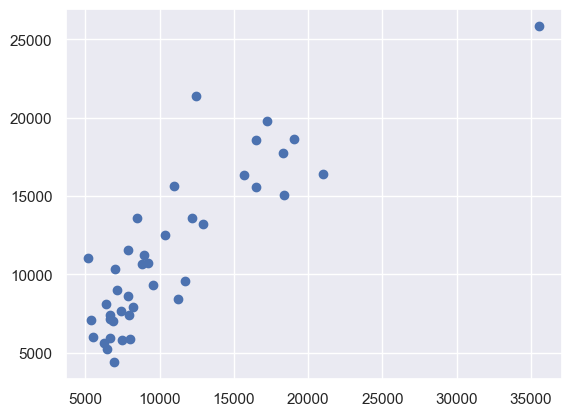

In [108]:
# Linearity between outcome
plt.scatter(y_test1,y_pred_lm_test1)
plt.show()

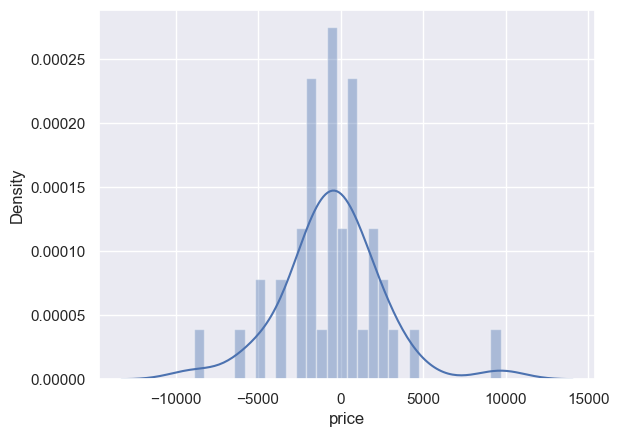

In [109]:
# Normality between Residual
sns.distplot((y_test1-y_pred_lm_test1),bins=30)
plt.show()